# ECON 323 Project: Classification of smoking and non-smoking

##### Group member: Jun Gu (34124974), Keqing Wang (35503457), Xingyu Xian (46865887), Zhekai Zhu (29860764)

----------

## Introduction

* ### Background

介绍背景， 记得找找reference

* ### Target

我们要做什么model？ 目的是什么？ 现实生活中能有什么用？

* ### Data and variables

介绍数据从哪来的？ 有哪些viariables? 哪个是我们要预测的variable?

## Methods

解说

* ### Load packages

In [454]:
#load package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
) #logistics
import plotly.express as px #piechart
import seaborn as sns #heatmap
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

解说接下来load data

* ### Load data

In [455]:
#load data
url = "https://raw.githubusercontent.com/JacksonZhuGithub/323_group_project/main/smoking.csv"
data = pd.read_csv(url)

#original data preview
data.head()

ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0      F   40         155          60       81.3             1.2   
1   1      F   40         160          60       81.0             0.8   
2   2      M   55         170          60       80.0             0.8   
3   3      M   40         165          70       88.0             1.5   
4   4      F   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  ...  hemoglobin  \
0              1.0            1.0             1.0  ...        12.9   
1              0.6            1.0             1.0  ...        12.7   
2              0.8            1.0             1.0  ...        15.8   
3              1.5            1.0             1.0  ...        14.7   
4              1.0            1.0             1.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     Y              0   
1            1.0               0.6  22.0  19.0  18.0     Y              0   
2            1.0               1.0  21.0  16.0  22.0     Y              0   
3            1.0               1.0  19.0  26.0  18.0     Y              0   
4            1.0               0.6  16.0  14.0  22.0     Y              0   

   tartar  smoking  
0       Y        0  
1       Y        0  
2       N        1  
3       Y        0  
4       N        0  

[5 rows x 27 columns]

In [456]:
#data shape
data.shape

(55692, 27)

解说一下几行几列 注意提到这是原始数据

* ### Wrangling and cleaning data

引言，让我们看看data信息

In [457]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

讲讲我们下一步计划怎么处理数据：

去掉"height(cm)","weight(kg)","waist(cm)","hearing(left)","hearing(right)"，"oral" ---》此处去掉6列  （合理解释）

视力求平均值， 然后去掉原左右视力两列 ---》此处加一列，去掉两列 （解释）

---》共去掉7列 应剩20列

In [458]:
#drop columns 'height(cm)', 'weight(kg)', 'waist(cm)', 'hearing(left)', 'hearing(right)', 'oral'
data.drop(["height(cm)","weight(kg)","waist(cm)","hearing(left)","hearing(right)","oral"], axis = 1, inplace = True)

#add a new column called 'eyesight', which indicating the mean eyesight, remove 'eyesight(left)' and 'eyesight(right)'
data['mean_eyesight']=(data['eyesight(left)']+data['eyesight(right)'])/2
data.drop(["eyesight(left)","eyesight(right)"], axis = 1, inplace = True)

In [459]:
data.head()

ID gender  age  systolic  relaxation  fasting blood sugar  Cholesterol  \
0   0      F   40     114.0        73.0                 94.0        215.0   
1   1      F   40     119.0        70.0                130.0        192.0   
2   2      M   55     138.0        86.0                 89.0        242.0   
3   3      M   40     100.0        60.0                 96.0        322.0   
4   4      F   40     120.0        74.0                 80.0        184.0   

   triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
0          82.0  73.0  126.0        12.9            1.0               0.7   
1         115.0  42.0  127.0        12.7            1.0               0.6   
2         182.0  55.0  151.0        15.8            1.0               1.0   
3         254.0  45.0  226.0        14.7            1.0               1.0   
4          74.0  62.0  107.0        12.5            1.0               0.6   

    AST   ALT   Gtp  dental caries tartar  smoking  mean_eyesight  
0  18.0  19.0  27.0              0      Y        0            1.1  
1  22.0  19.0  18.0              0      Y        0            0.7  
2  21.0  16.0  22.0              0      N        1            0.8  
3  19.0  26.0  18.0              0      Y        0            1.5  
4  16.0  14.0  22.0              0      N        0            1.0

In [460]:
data.shape

(55692, 20)

20列，正确

接下来把‘smoking’的0和1 换成 “N”“Y” （解释0,1代表什么，再解释N Y代表什么）

把‘smoking’放置最后一列 （为了方便看）

In [461]:
#convert smoking status 0 and 1 to string
data['smoking'] = data['smoking'].astype(str)

#smoking status: Y: smoker N:non-smoker
data['smoking'] = data['smoking'].str.replace('1','Y')
data['smoking'] = data['smoking'].str.replace('0','N')

#make 'smoking' be the last column
smoking_col=data.pop('smoking')
data['smoking']=smoking_col

In [462]:
#final data preview
data.head()

ID gender  age  systolic  relaxation  fasting blood sugar  Cholesterol  \
0   0      F   40     114.0        73.0                 94.0        215.0   
1   1      F   40     119.0        70.0                130.0        192.0   
2   2      M   55     138.0        86.0                 89.0        242.0   
3   3      M   40     100.0        60.0                 96.0        322.0   
4   4      F   40     120.0        74.0                 80.0        184.0   

   triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
0          82.0  73.0  126.0        12.9            1.0               0.7   
1         115.0  42.0  127.0        12.7            1.0               0.6   
2         182.0  55.0  151.0        15.8            1.0               1.0   
3         254.0  45.0  226.0        14.7            1.0               1.0   
4          74.0  62.0  107.0        12.5            1.0               0.6   

    AST   ALT   Gtp  dental caries tartar  mean_eyesight smoking  
0  18.0  19.0  27.0              0      Y            1.1       N  
1  22.0  19.0  18.0              0      Y            0.7       N  
2  21.0  16.0  22.0              0      N            0.8       Y  
3  19.0  26.0  18.0              0      Y            1.5       N  
4  16.0  14.0  22.0              0      N            1.0       N

查看有无empty value

In [463]:
data.isna().sum()

ID                     0
gender                 0
age                    0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
mean_eyesight          0
smoking                0
dtype: int64

好，可以下一步，对数据进行基本的可视化

* ### Exploratory Data Analysis

首先只看抽烟的比例

([<matplotlib.patches.Wedge at 0x7f7dfefbb760>,
 [Text(-0.4454481244299395, 1.0057713300953897, 'Non-smoke'),
  Text(0.5061910504885672, -1.1429219660174885, 'Smoke')],
 [Text(-0.24297170423451242, 0.5486025436883943, '63.271%'),
  Text(0.3037146302931403, -0.6857531796104931, '36.729%')])

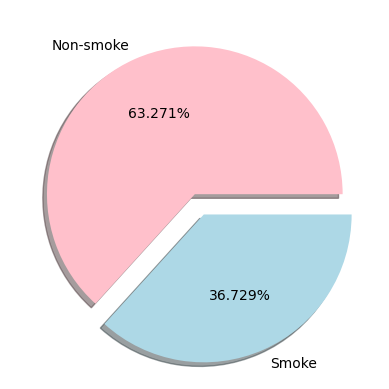

In [464]:
###smoking proportion
#------------------------------
#count the number of female and  male
smoking_count=data['smoking'].value_counts()

fig, ax=plt.subplots()
ax.pie(smoking_count,labels=['Non-smoke','Smoke'],autopct='%.3f%%',shadow=True,explode = [0, 0.15],colors=["pink","lightblue"])

说明一下

接下来看男女比例

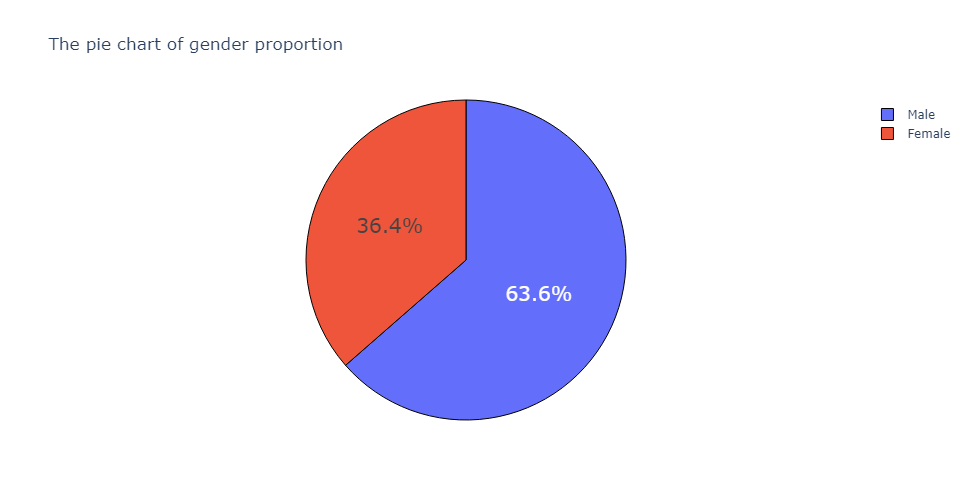

In [465]:
###gender proportion
#--------------------------------------------------
gender_count_df = {'gender': ["Male", "Female"], 'count': [35401, 20291]}
gender_count_df = pd.DataFrame(data=d)

fig = px.pie(gender_count_df,
             values='count',
             names='gender', 
             title='The pie chart of gender proportion',
             width=1000, height=500)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=1)))

说明

接下来研究年龄：年龄分布，抽烟和年龄的Boxplot（把年龄按中位数分为二份）

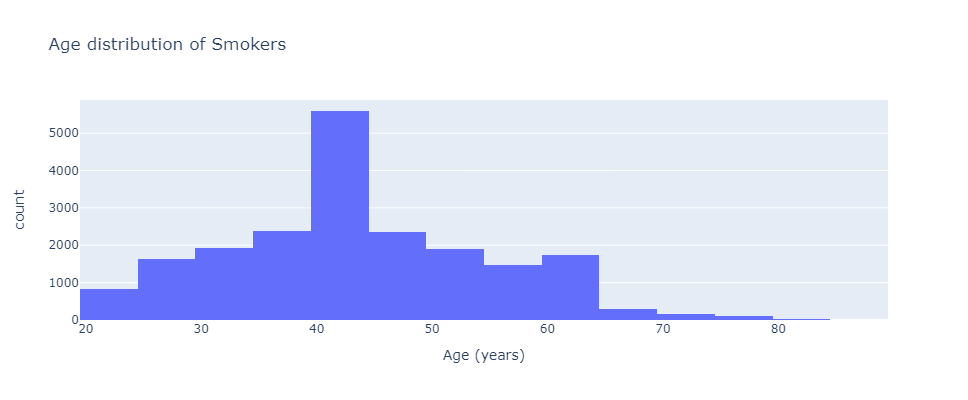

In [466]:
###Age barchart
#--------------------------------------------------
age_df=data['age']
fig1=px.histogram(age_df,x="age",width=400, height=400,labels=dict(age="Age (years)"),title="Age distribution of population")

age_smoke_df=data.loc[(data['smoking']=="Y")]['age']
fig2=px.histogram(age_smoke_df,x="age",width=400, height=400,labels=dict(age="Age (years)"),title="Age distribution of Smokers")

age_non_smoke_df=data.loc[(data['smoking']=="N")]['age']
fig3=px.histogram(age_non_smoke_df,x="age",width=400, height=400,labels=dict(age="Age (years)"),title="Age distribution of Non-Smokers")

fig1.show()
fig2.show()
fig3.show()

解释说明

接下来看抽烟与否对‘systolic’（心脏收缩压），和relaxation（舒张压）的有没有影响

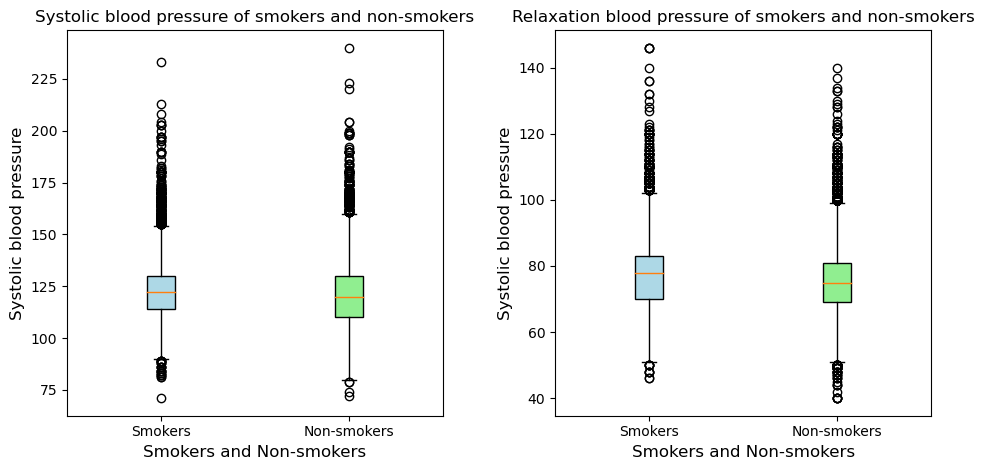

In [467]:
###systolic
#--------------------------------------------------
#select column "systolic", and column "smoiking"
systolic_smoke = data.loc[(data['smoking'] == "Y")]["systolic"]
systolic_non_smoke=data.loc[(data['smoking'] == "N")]["systolic"]

#select column "relaxation", and column "smoiking"
relaxation_smoke = data.loc[(data['smoking'] == "Y")]["relaxation"]
relaxation_non_smoke=data.loc[(data['smoking'] == "N")]["relaxation"]

#plot systolic
fig, ax=plt.subplots(1,2)
boxplot_systolic=ax[0].boxplot(x=[systolic_smoke,systolic_non_smoke],
                               labels=["Smokers","Non-smokers"],
                               patch_artist=True)

colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot_systolic['boxes'], colors):
    patch.set_facecolor(color)

ax[0].set_title("Systolic blood pressure of smokers and non-smokers",fontsize=12)
ax[0].set_ylabel("Systolic blood pressure",fontsize=12)
ax[0].set_xlabel("Smokers and Non-smokers",fontsize=12)

#plot relaxation
boxplot_relaxation=ax[1].boxplot(x=[relaxation_smoke,relaxation_non_smoke],
                               labels=["Smokers","Non-smokers"],
                               patch_artist=True)

colors = ['lightblue', 'lightgreen']
for patch, color in zip(boxplot_relaxation['boxes'], colors):
    patch.set_facecolor(color)

ax[1].set_title("Relaxation blood pressure of smokers and non-smokers",fontsize=12)
ax[1].set_ylabel("Systolic blood pressure",fontsize=12)
ax[1].set_xlabel("Smokers and Non-smokers",fontsize=12)

fig.tight_layout()
fig.set_figwidth(10,2)

解说：差别不大

接下来画空腹血糖：outliers会压缩图片，导致看不清，所以移除Outliers.

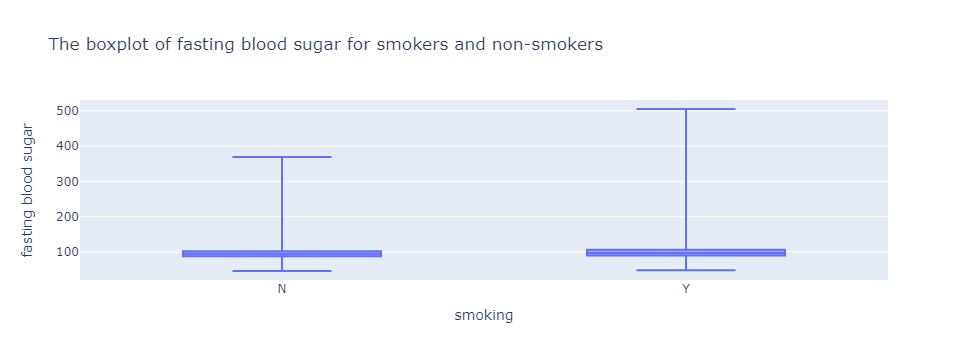

In [468]:
###fasting blood sugar
fig = px.box(data, x="smoking", y="fasting blood sugar",
             points=False,
             title="The boxplot of fasting blood sugar for smokers and non-smokers")
fig.show()

剩下的看起来都很有关，所以不单独画图分析，直接用heat-map代替， 除了视力。所以现在画视力

In [469]:
fig = px.box(data, x="smoking", y="mean_eyesight",
             points=False,
             title="The boxplot of fasting blood sugar for smokers and non-smokers")
fig.show()

没什么用，移除视力 原因：图看不出东西，且视力受其他方面影响更大。吸烟也许只是很小一部分原因。

In [470]:
#remove 'mean_eyesight' column
data.drop(['mean_eyesight'], axis = 1, inplace = True)

#final data
data.head()

ID gender  age  systolic  relaxation  fasting blood sugar  Cholesterol  \
0   0      F   40     114.0        73.0                 94.0        215.0   
1   1      F   40     119.0        70.0                130.0        192.0   
2   2      M   55     138.0        86.0                 89.0        242.0   
3   3      M   40     100.0        60.0                 96.0        322.0   
4   4      F   40     120.0        74.0                 80.0        184.0   

   triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine  \
0          82.0  73.0  126.0        12.9            1.0               0.7   
1         115.0  42.0  127.0        12.7            1.0               0.6   
2         182.0  55.0  151.0        15.8            1.0               1.0   
3         254.0  45.0  226.0        14.7            1.0               1.0   
4          74.0  62.0  107.0        12.5            1.0               0.6   

    AST   ALT   Gtp  dental caries tartar smoking  
0  18.0  19.0  27.0              0      Y       N  
1  22.0  19.0  18.0              0      Y       N  
2  21.0  16.0  22.0              0      N       Y  
3  19.0  26.0  18.0              0      Y       N  
4  16.0  14.0  22.0              0      N       N

In [471]:
data.shape

(55692, 19)

19列正确 开始做heatmap

In [472]:
#dataframe with all variables in numbers
data_num=data

#smoking status change back to 0 1 for making heat map
data_num['smoking'] = data_num['smoking'].str.replace('Y','1')
data_num['smoking'] = data_num['smoking'].str.replace('N','0')
data_num['smoking'] = data_num['smoking'].astype(int)

#genger change to 0 1 for making heat map
data_num['gender'] = data_num['gender'].str.replace('M','0')
data_num['gender'] = data_num['gender'].str.replace('F','1')
data_num['gender'] = data_num['gender'].astype(int)

#tartar change to 0 1 for making heat map
data_num['tartar'] = data_num['tartar'].str.replace('Y','1')
data_num['tartar'] = data_num['tartar'].str.replace('N','0')
data_num['tartar'] = data_num['tartar'].astype(int)


#heatmap
plt.figure(figsize=(20,10))
heat_map=sns.heatmap(data_num.corr(),annot=True)
plt.xticks(rotation=30, ha='right');

解释 总结

* ### Model Fitting (Classification based on Logistics Regression)

开始做model

首先分为train test

In [473]:
#training data and testing data, random_state=323 for reproducible
train = data_num.sample(frac = 0.75,random_state = 323) 
test = data_num.drop(train.index)

#X_train, y_train, X_test, y_test
X_train=train.drop(['smoking'],axis=1)
y_train=train["smoking"]

X_test=test.drop(['smoking'],axis=1)
y_test=test["smoking"]

#shape
print(f"Shape of training data X: {X_train.shape}")
print(f"Shape of testing data y: {y_train.shape}")
print(f"Shape of training data X: {X_test.shape}")
print(f"Shape of training data y: {y_test.shape}")

Shape of training data X: (41769, 18)
Shape of testing data y: (41769,)
Shape of training data X: (13923, 18)
Shape of training data y: (13923,)


解说

In [475]:
#logistics regression
logistic_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [479]:
#accuracy
train_acc = logistic_model.score(X_train, y_train)
test_acc = logistic_model.score(X_test, y_test)

print(f"The accuracy for Training data is: {train_acc}")
print(f"The accuracy for Testing data is: {test_acc}")

The accuracy for Training data is: 0.6923795159089277
The accuracy for Testing data is: 0.6855562737915679


解释

接下来画ROC

In [477]:
#ROC
def plot_roc(mod, X, y):
    # predicted_probs is an N x 2 array, where N is number of observations
    # and 2 is number of classes
    predicted_probs = mod.predict_proba(X_test)

    # keep the second column, for label=1
    predicted_prob1 = predicted_probs[:, 1]

    fpr, tpr, _ = metrics.roc_curve(y_test, predicted_prob1)

    # Plot ROC curve
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], "k--")
    ax.plot(fpr, tpr)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve")

plot_roc(logistic_model, X_test, y_test)

解释

* ### Model Fitting (Classification based on Decision Tree)

## Results

## Disccussion

------------------------------

## References